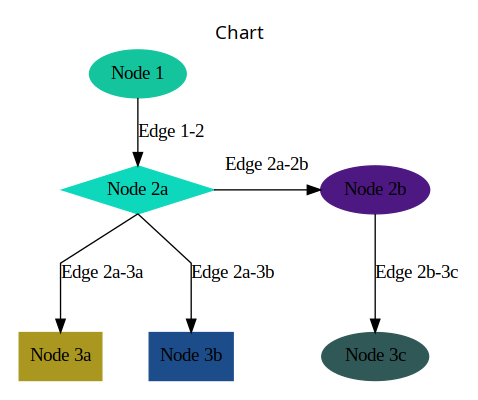

In [1]:
# 0. Import dependencies.
import random
import pydot
from pydot_flow import Chart
from IPython.display import Image


# 1. Define a function for creating a random color code.
def random_color():
    "Generate a random color."
    return "#" + hex(random.randint(0, 0xFFFFFF))[2:].rjust(6, "0")


# 2. Create a Pydot flow Chart.
chart = Chart(
    rankdir="TB", splines="false", label="Chart", labelloc="t", fontname="Sans", pad=0.2
)

# 3. Set Node defaults.
chart.get_graph().set_node_defaults(style="filled")

# 4. Create the first Node and name it Node 1.
node_1 = chart.create_node(src_node_attrs={"label": "Node 1", "color": random_color()})

# 5. Flow south from Node 1 to Node 2a.
node_2a = node_1.flow(
    src_port="s",
    dst_node_attrs={"label": "Node 2a", "shape": "diamond", "color": random_color()},
    edge_attrs={"label": "Edge 1-2"},
)

# 6. Flow east from Node 2a to Node 2b; step into a new subgraph with rank set to same.
node_2b = node_2a.flow(
    src_port="e",
    dst_node_attrs={"label": "Node 2b", "color": random_color()},
    edge_attrs={"label": "Edge 2a-2b", "minlen": 2},
    graph=pydot.Subgraph(rank="same"),
)

# 7. Flow south from Node 2b to Node 3c; step back into the parent graph - break rank.
node_3c = node_2b.flow(
    src_port="s",
    dst_node_attrs={"label": "Node 3c", "color": random_color()},
    edge_attrs={"label": "Edge 2b-3c", "minlen": 2},
    graph=chart.get_graph(),
)

# 8. Return to Node 2a and flow south from Node 2a to Node 3a.
node_3a = node_2a.flow(
    src_port="s",
    dst_node_attrs={"label": "Node 3a", "shape": "box", "color": random_color()},
    edge_attrs={"label": "Edge 2a-3a", "minlen": 2, "labeldistance": 2},
)

# 9. Return again to Node 2a and flow south from Node 2a to Node 3b.
node_3b = node_2a.flow(
    src_port="s",
    dst_node_attrs={"label": "Node 3b", "shape": "box", "color": random_color()},
    edge_attrs={"label": "Edge 2a-3b", "minlen": 2},
)

# 10. Save the graph image to a file.
chart.get_graph().write_png("output.png")

# 11. Output an image in a Jupyter Notebook.
Image(chart.get_graph().create_png())